## Required packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns

from sklearn import tree
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier   
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score  # R square
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from collections import Counter
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.inspection import permutation_importance
import pickle
import shap
from sklearn.metrics import roc_curve, auc
import matplotlib.cm as cm

## Define Functions for Machine Learning Model

In [2]:
def calc_metrics(y_test, preds):
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1score = f1_score(y_test, preds)
    print(accuracy, precision, recall, f1score)
    return (accuracy, precision, recall, f1score)

def model_predict(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    return accuracy_score(y_predict_train, y_train), accuracy_score(y_predict_test, y_test), y_predict_test

def sort_feature(feature_names, feature_vals):
    assert len(feature_names) == len(feature_vals)
    x_and_y = [(x, y) for x, y in zip(feature_names, feature_vals)]
    x_and_y.sort(key = lambda x: -x[1])
    return [item[0] for item in x_and_y], [item[1] for item in x_and_y]

def plot_topN_feature_importance(columns, feature_importance, title):
    columns, feature_importance = sort_feature(columns, feature_importance)
    plt.figure()

    x = columns; y = feature_importance
    xsum=[]; ysum=[]
    for i in range(len(y)):
        sum=0
        for j in range(i+1):
            sum=sum+y[j]
        xsum.append(i+1)
        ysum.append(sum)
        
    ysum=ysum/max(ysum)
    
    plt.scatter(xsum, ysum, c='red')
    plt.plot(xsum, ysum, c='red')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(title, fontsize=18)
    plt.xlabel("Number of Top-N feature importance", fontsize=18)
    plt.ylabel("Cumulative Probability", fontsize=18)

def plot_feature_importance(columns, feature_importance, title):
    columns, feature_importance = sort_feature(columns, feature_importance)
    plt.figure()

    x = columns; y = feature_importance

    norm = plt.Normalize(min(y), max(y))
    norm_y = 1.2 - norm(y)
        
    map_vir = cm.get_cmap(name='autumn')
    colormp = map_vir(norm_y)

    plt.yticks(fontsize=16)
    plt.ylabel("Feature importance", fontsize=18)  
    plt.xticks(rotation=90, fontsize=16)    
    plt.xlim([-0.55, 24.55])
    plt.bar(columns, feature_importance, color=colormp)
    plt.title(title, fontsize=18)

## Six Machine Learning Algorithms

In [3]:
def machine_learning(x, y, split_ratio=0.3, random_seed=28):
    x = (x - x.mean()) / x.std()    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = split_ratio, random_state = random_seed, shuffle = True)

    print("train size: {}, test size {} ".format(len(x_train), len(x_test)))
    print('traditional_any_alt/test dataset:', x_test.shape)
    print('traditional_any_alt/train dataset:', x_train.shape)

    def get_feature_importance(model):
      try:
        return model.feature_importances_
      except AttributeError:
        return None

    map = {}
    # Logistic Regression
    print("Starting Logistic Regression。。。")
    time1 = time.time()
    lr_model = LogisticRegression()
    score_train, score_test, y_predict_test = model_predict(lr_model, x_train, y_train, x_test, y_test)
    y_pred_proba = lr_model.predict_proba(x_test)[:,1]
    map['Logistic Regression'] = (score_train, score_test, get_feature_importance(lr_model), lr_model, y_test, y_pred_proba)
    print("Used time：{}s  Training score:{}  Testing score:{}".format(time.time() - time1, score_train, score_test))
    calc_metrics(y_test, y_predict_test)

    # Naive Bayes
    print("Starting Naive Bayes。。。")
    time1 = time.time()
    nb_model = GaussianNB()
    score_train, score_test, y_predict_test = model_predict(nb_model, x_train, y_train, x_test, y_test)
    y_pred_proba = nb_model.predict_proba(x_test)[:,1]
    map['Naive Bayes'] = (score_train, score_test, get_feature_importance(nb_model), nb_model, y_test, y_pred_proba)
    print("Used time：{}s  Training score:{}  Testing score:{}".format(time.time() - time1, score_train, score_test))
    calc_metrics(y_test, y_predict_test)

    # Decision Tree
    print("Starting Decision Tree。。。")
    time1 = time.time()
    dt_model = tree.DecisionTreeClassifier()
    score_train, score_test, y_predict_test = model_predict(dt_model, x_train, y_train, x_test, y_test)
    y_pred_proba = dt_model.predict_proba(x_test)[:,1]
    map['Decision Tree'] = (score_train, score_test, get_feature_importance(dt_model), dt_model, y_test, y_pred_proba)
    print("Used time：{}s  Training score:{}  Testing score:{}".format(time.time() - time1, score_train, score_test))
    calc_metrics(y_test, y_predict_test)

    # Random Forest
    print("Starting Random Forest。。。")
    time1 = time.time()
    rf_model = RandomForestClassifier()
    score_train, score_test, y_predict_test = model_predict(rf_model, x_train, y_train, x_test, y_test)
    y_pred_proba = rf_model.predict_proba(x_test)[:,1]
    map['Random Forest'] = (score_train, score_test, get_feature_importance(rf_model), rf_model, y_test, y_pred_proba)
    print("Used time：{}s  Training score:{}  Testing score:{}".format(time.time() - time1, score_train, score_test))
    calc_metrics(y_test, y_predict_test)

    # KNN
    print("Starting KNN。。。")
    time1 = time.time()
    kn_model = KNeighborsClassifier() 
    score_train, score_test, y_predict_test = model_predict(kn_model, x_train, y_train, x_test, y_test)
    y_pred_proba = kn_model.predict_proba(x_test)[:,1]
    map['KNN'] = (score_train, score_test, get_feature_importance(kn_model), kn_model, y_test, y_pred_proba)
    print("Used time：{}s  Training score:{}  Testing score:{}".format(time.time() - time1, score_train, score_test))
    calc_metrics(y_test, y_predict_test)
    
    # LightGBM
    print("Starting LightGBM。。。")
    time1 = time.time()
    gbm = lgb.LGBMClassifier(random_state=random_seed)
    score_train, score_test, y_predict_test = model_predict(gbm, x_train, y_train, x_test, y_test)
    y_pred_proba = gbm.predict_proba(x_test)[:,1]
    map['LightGBM'] = (score_train, score_test, get_feature_importance(gbm), gbm, y_test, y_pred_proba)
    print("Used time：{}s  Training score:{}  Testing score:{}".format(time.time() - time1, score_train, score_test))
    calc_metrics(y_test, y_predict_test)
    
    return map

result_map = {}

## Load Dataset

In [ ]:
df = pd.read_csv('./414188yidan.csv')

# independent variable
df_src = df[['gender', 'age', 'siblings', 'bo', 'grade', 'sfsc', 'OBSES', 'chat',
             'care0', 'care1', 'care2','care3','care4','care5','care6','care7','care8',
             'Sregion', 'Stype', 'sssc', 'friends', 'sport', 'screen', 'game', 'video', 'book', 'ecf', 
             'BMI', 'DEP', 'PEI', 'NEI', 'SWLS', 'PMH', 'hos1', 'hos2', 'myopia', 'ST', 
             'drink', 'smoke', 'shs']].astype(float)

# dependent variable
df_tgt = df[['traditional_any_alt']]
print("Data prepare done")

oversample = SMOTE()
X, Y = oversample.fit_resample(df_src, df_tgt.values.ravel())
print("Oversample done")

# running times
for i in range(1):
    result_map[i] = machine_learning(X,Y,random_seed=i)

## Feature importances for Traditional Bullying 

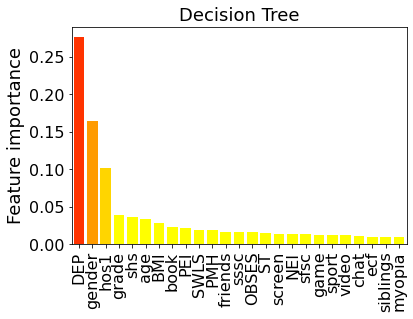

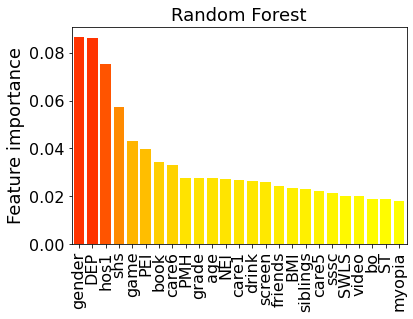

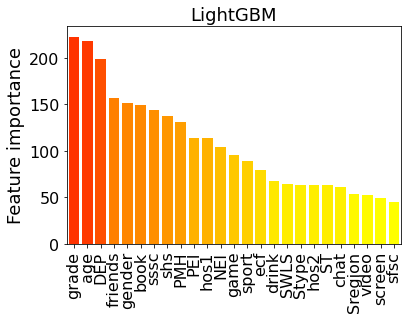

In [8]:
rfvals=[]
litgbm=[]

for model_name, vals in result_map[0].items():
    if isinstance(vals[2], np.ndarray):
        plot_feature_importance(df_src.columns, vals[2], model_name)
        
        if model_name == 'Random Forest':
            rfvals_max=max(vals[2])
            for i in range(len(df_src.columns)):
                rfvals.append(vals[2][i]/rfvals_max*100)
            
        if model_name == 'LightGBM':
            litgbm_max=max(vals[2])
            for i in range(len(df_src.columns)):
                litgbm.append(vals[2][i]/litgbm_max*100)

## Cumulative Probability of the Top-N feature importance

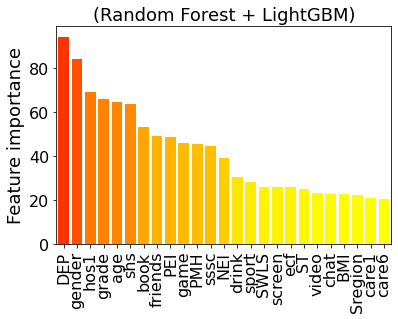

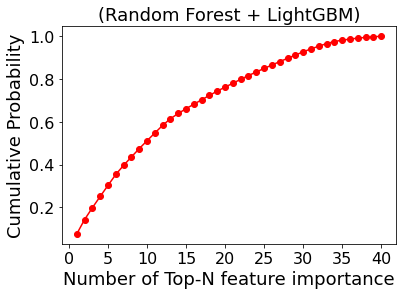

In [7]:
ave_rfgbm=[]
for i in range(len(df_src.columns)):
    ave_rfgbm.append((rfvals[i]+litgbm[i])/2.0)
    
plot_feature_importance(df_src.columns, ave_rfgbm, '(Random Forest + LightGBM)')
plot_topN_feature_importance(df_src.columns, ave_rfgbm, '(Random Forest + LightGBM)')